## <strong><center>`Final Project` </center></strong> 
_____________________________________________________________

#### `Importing Necessary Libraries`

In [2]:
import pandas as pd
import numpy as np 
# from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt
import seaborn as sns

#### `Starting Spark Session`

In [3]:
# We are proceeding with the Pyspark for this project
# Starting the Spark Session
spark = SparkSession.builder.getOrCreate()

#### `Importing  Data Set`

In [4]:
# Importing all the csv in the folder 
# Dear Professor in order to check the pls change the path here 
path = "/Users/shanmu/Desktop/Data Modeling/electric-vehicle-population-project/"
ds = spark.read.csv(path + "Electric_Vehicle_Population_Data.csv", header=True)
dsReg = spark.read.csv(path + "Electric_Vehicle_Title_and_Registration_Activity.csv", header=True, inferSchema=True)
dsWeather = spark.read.csv(path + "washington-weather.csv", header=True, inferSchema=True)
ds.show()

+----------+---------+----------+-----+-----------+----------+------+-----------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|VIN (1-10)|   County|      City|State|Postal Code|Model Year|  Make|      Model|Electric Vehicle Type|Clean Alternative Fuel Vehicle (CAFV) Eligibility|Electric Range|Base MSRP|Legislative District|DOL Vehicle ID|    Vehicle Location|    Electric Utility|2020 Census Tract|
+----------+---------+----------+-----+-----------+----------+------+-----------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|5YJ3E1EA0K| Thurston|  Tumwater|   WA|      98512|      2019| TESLA|    MODEL 3| Battery Electric ...|                             Clean Alternative...|           220|       

In [5]:
dsReg.show()

+-----------------------------------+----------+--------------+----------+---------+-------+-------------------+--------------+----------------+--------------------+-------------------+----------+---------------+---------+--------------------+--------------------+----------------+------+------------+------------------+-----------+----------------------------------+--------------------------------------------------------------+---------------------------------------------+----------------------------------------+-----------------------------------------------+---------------------------------------+---------------------------------------+------------------------------------------+-------------------------+---------------------------------------+---------------------------------------+-----------------+--------------------+--------------------+
|Clean Alternative Fuel Vehicle Type|VIN (1-10)|DOL Vehicle ID|Model Year|     Make|  Model|Vehicle Primary Use|Electric Range|Odometer Reading| 

In [187]:
dsIncome = spark.read.csv(path + "washington-income.csv", header=True, inferSchema=True)
dsIncome.show()

+----+----------+----+
|YEAR|WASHINGTON|  US|
+----+----------+----+
|1929|       740| 700|
|1930|       657| 621|
|1931|       534| 529|
|1932|       402| 403|
|1933|       376| 376|
|1934|       442| 428|
|1935|       491| 478|
|1936|       570| 540|
|1937|       601| 579|
|1938|       583| 532|
|1939|       618| 562|
|1940|       667| 601|
|1941|       885| 734|
|1942|      1233| 940|
|1943|      1507|1142|
|1944|      1557|1226|
|1945|      1452|1256|
|1946|      1432|1291|
|1947|      1531|1349|
|1948|      1678|1456|
+----+----------+----+
only showing top 20 rows



In [7]:
dsWeather.show()

+----+-----+-------+
|Date|Value|Anomaly|
+----+-----+-------+
|1895| 45.2|   -0.9|
|1896| 45.4|   -0.7|
|1897| 45.3|   -0.8|
|1898| 45.7|   -0.4|
|1899| 45.1|   -1.0|
|1900| 47.0|    0.9|
|1901| 45.8|   -0.3|
|1902| 45.3|   -0.8|
|1903| 44.9|   -1.2|
|1904| 46.6|    0.5|
|1905| 45.9|   -0.2|
|1906| 46.9|    0.8|
|1907| 45.2|   -0.9|
|1908| 45.9|   -0.2|
|1909| 44.3|   -1.8|
|1910| 46.0|   -0.1|
|1911| 44.7|   -1.4|
|1912| 45.5|   -0.6|
|1913| 44.7|   -1.4|
|1914| 46.5|    0.4|
+----+-----+-------+
only showing top 20 rows



####  `Exploratory Data Analysis` <br>
`Diving deep into the dataset to gain insights`

##### <u>`Analysing the Data Set 1 - EV Population` </u>

In [8]:
# Printing the number of rows and columns 
print("The total number of rows are {} and the Total Number of Columns are {}".format(ds.count(), len(ds.columns)))

The total number of rows are 135038 and the Total Number of Columns are 17


In [9]:
# Printing the Schema of the Dataset
ds.printSchema()

root
 |-- VIN (1-10): string (nullable = true)
 |-- County: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal Code: string (nullable = true)
 |-- Model Year: string (nullable = true)
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Electric Vehicle Type: string (nullable = true)
 |-- Clean Alternative Fuel Vehicle (CAFV) Eligibility: string (nullable = true)
 |-- Electric Range: string (nullable = true)
 |-- Base MSRP: string (nullable = true)
 |-- Legislative District: string (nullable = true)
 |-- DOL Vehicle ID: string (nullable = true)
 |-- Vehicle Location: string (nullable = true)
 |-- Electric Utility: string (nullable = true)
 |-- 2020 Census Tract: string (nullable = true)



In [10]:
# Listing only the columns
ds.columns

['VIN (1-10)',
 'County',
 'City',
 'State',
 'Postal Code',
 'Model Year',
 'Make',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Range',
 'Base MSRP',
 'Legislative District',
 'DOL Vehicle ID',
 'Vehicle Location',
 'Electric Utility',
 '2020 Census Tract']

In [11]:
# Converting the columns to Integer

ds = ds.withColumn("Postal Code", col("Postal Code").cast(IntegerType()))
ds = ds.withColumn("Model Year", col("Model Year").cast(IntegerType()))
ds = ds.withColumn("Electric Range", col("Electric Range").cast(IntegerType()))
ds = ds.withColumn("Base MSRP", col("Base MSRP").cast(IntegerType()))
ds = ds.withColumn("Postal Code", col("Postal Code").cast(IntegerType()))
ds = ds.withColumn("Legislative District", col("Legislative District").cast(IntegerType()))

ds.printSchema()

root
 |-- VIN (1-10): string (nullable = true)
 |-- County: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal Code: integer (nullable = true)
 |-- Model Year: integer (nullable = true)
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Electric Vehicle Type: string (nullable = true)
 |-- Clean Alternative Fuel Vehicle (CAFV) Eligibility: string (nullable = true)
 |-- Electric Range: integer (nullable = true)
 |-- Base MSRP: integer (nullable = true)
 |-- Legislative District: integer (nullable = true)
 |-- DOL Vehicle ID: string (nullable = true)
 |-- Vehicle Location: string (nullable = true)
 |-- Electric Utility: string (nullable = true)
 |-- 2020 Census Tract: string (nullable = true)



In [12]:
# Finding the Null Values 
# Counting null values in each column
null_counts = ds.select([sum(col(c).isNull().cast("int")).alias(c) for c in ds.columns])

# Converting the result to a dictionary for better display
null_counts_dict = null_counts.first().asDict()

print("The count of the null values in the each columns are as follows:")
for column, count in null_counts_dict.items():
    print(f" '{column}': {count}")

The count of the null values in the each columns are as follows:
 'VIN (1-10)': 0
 'County': 8
 'City': 8
 'State': 0
 'Postal Code': 8
 'Model Year': 0
 'Make': 0
 'Model': 249
 'Electric Vehicle Type': 0
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 0
 'Electric Range': 1
 'Base MSRP': 1
 'Legislative District': 312
 'DOL Vehicle ID': 0
 'Vehicle Location': 10
 'Electric Utility': 8
 '2020 Census Tract': 8


In [13]:
# Confirming the data which are having 8 missing values are in the same row
# ds.filter(ds["County"].isNull()).show()
ds.filter(ds["Electric Range"].isNull()).show()

+----------+---------+-----------+-----+-----------+----------+-------+--------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|VIN (1-10)|   County|       City|State|Postal Code|Model Year|   Make|   Model|Electric Vehicle Type|Clean Alternative Fuel Vehicle (CAFV) Eligibility|Electric Range|Base MSRP|Legislative District|DOL Vehicle ID|    Vehicle Location|    Electric Utility|2020 Census Tract|
+----------+---------+-----------+-----+-----------+----------+-------+--------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|WP0BE2A7XP|Jefferson|Port Ludlow|   WA|      98365|      2023|PORSCHE|PANAMERA| Plug-in Hybrid El...|                             Clean Alternative...|          null|     null| 

In [14]:
""" After Confirmation, Handling the Null Values for the Colums
 County, City, Postal Code, Electric Utiliy, 2020 Census Tract """

ds = ds.fillna('No Data', subset=['County', 'City', 'Electric Utility', '2020 Census Tract'])
ds = ds.fillna(0, subset=['Postal Code'])

In [15]:
# Replacing the Data with Mean 
# Calculating the mean value of 'Electric Range' column
electricRangeMean = ds.select(mean(col('Electric Range'))).first()[0]

# Calculating the mean value of 'Base MSRP' column
baseMsrpMean = ds.select(mean(col('Base MSRP'))).first()[0]

ds = ds.fillna(electricRangeMean, subset=['Electric Range'])
ds = ds.fillna(baseMsrpMean, subset=['Base MSRP'])

In [16]:
# Describe using Spark
ds.select('Electric Range', 'Base MSRP', 'Legislative District').describe().show()

+-------+-----------------+-----------------+--------------------+
|summary|   Electric Range|        Base MSRP|Legislative District|
+-------+-----------------+-----------------+--------------------+
|  count|           135038|           135038|              134726|
|   mean|74.59195930034508|1448.407322383329|  29.504379258643468|
| stddev|98.74375409698548| 9683.62228219301|  14.783779638721953|
|    min|                0|                0|                   1|
|    max|              337|           845000|                  49|
+-------+-----------------+-----------------+--------------------+



In [17]:
# We didnt get the values of median, 25% and 75% we tried summary to get those stats
ds.select('Electric Range', 'Base MSRP', 'Legislative District').summary("count", "mean", "stddev", "min", "25%", "50%", "75%", "max").show()

+-------+-----------------+-----------------+--------------------+
|summary|   Electric Range|        Base MSRP|Legislative District|
+-------+-----------------+-----------------+--------------------+
|  count|           135038|           135038|              134726|
|   mean|74.59195930034508|1448.407322383329|  29.504379258643468|
| stddev|98.74375409698548| 9683.62228219301|  14.783779638721953|
|    min|                0|                0|                   1|
|    25%|                0|                0|                  18|
|    50%|               21|                0|                  34|
|    75%|              150|                0|                  43|
|    max|              337|           845000|                  49|
+-------+-----------------+-----------------+--------------------+



In [18]:
unique_counts = []
for column in ds.columns:
    unique_count = ds.select(approx_count_distinct(col(column))).first()[0]
    unique_counts.append((column, unique_count))

# Display the number of unique values in each column
for column, count in unique_counts:
    print(f"'{column}': {count} unique values")

'VIN (1-10)': 9365 unique values
'County': 166 unique values
'City': 694 unique values
'State': 47 unique values
'Postal Code': 802 unique values
'Model Year': 21 unique values
'Make': 32 unique values
'Model': 125 unique values
'Electric Vehicle Type': 2 unique values
'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 3 unique values
'Electric Range': 105 unique values
'Base MSRP': 33 unique values
'Legislative District': 49 unique values
'DOL Vehicle ID': 135319 unique values
'Vehicle Location': 739 unique values
'Electric Utility': 83 unique values
'2020 Census Tract': 1896 unique values


In [19]:
# Unique Years and Its Count 
ds.groupBy('Model Year').count().orderBy(col('Model Year')).show()



+----------+-----+
|Model Year|count|
+----------+-----+
|      1997|    1|
|      1998|    1|
|      1999|    4|
|      2000|    9|
|      2002|    2|
|      2003|    1|
|      2008|   20|
|      2010|   23|
|      2011|  815|
|      2012| 1657|
|      2013| 4598|
|      2014| 3601|
|      2015| 4925|
|      2016| 5688|
|      2017| 8579|
|      2018|14343|
|      2019|10577|
|      2020|11151|
|      2021|18554|
|      2022|27983|
+----------+-----+
only showing top 20 rows



In [20]:
# County and Its Count 
ds.groupBy('County').count().orderBy(col('count').desc()).show()


+------------+-----+
|      County|count|
+------------+-----+
|        King|70842|
|   Snohomish|15258|
|      Pierce|10410|
|       Clark| 7997|
|    Thurston| 4851|
|      Kitsap| 4461|
|     Spokane| 3326|
|     Whatcom| 3315|
|      Benton| 1688|
|      Skagit| 1504|
|      Island| 1496|
|     Clallam|  830|
|   Jefferson|  828|
|    San Juan|  802|
|      Chelan|  796|
|      Yakima|  735|
|     Cowlitz|  664|
|       Mason|  639|
|       Lewis|  515|
|Grays Harbor|  476|
+------------+-----+
only showing top 20 rows



In [21]:
# City and Its Count 
ds.groupBy('City').count().orderBy(col('count').desc()).show()


+-------------+-----+
|         City|count|
+-------------+-----+
|      Seattle|23489|
|     Bellevue| 6960|
|      Redmond| 4965|
|    Vancouver| 4819|
|     Kirkland| 4201|
|      Bothell| 4196|
|    Sammamish| 3950|
|       Renton| 3516|
|      Olympia| 3228|
|       Tacoma| 2846|
|   Bellingham| 2281|
|     Issaquah| 2108|
|      Spokane| 1999|
|Mercer Island| 1943|
|         Kent| 1942|
|     Lynnwood| 1895|
|  Woodinville| 1873|
|      Everett| 1804|
|    Snohomish| 1567|
|   Gig Harbor| 1525|
+-------------+-----+
only showing top 20 rows



In [22]:
ds.filter(ds["Model Year"]==2024).show()

+----------+---------+----------------+-----+-----------+----------+-----+-------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|VIN (1-10)|   County|            City|State|Postal Code|Model Year| Make|  Model|Electric Vehicle Type|Clean Alternative Fuel Vehicle (CAFV) Eligibility|Electric Range|Base MSRP|Legislative District|DOL Vehicle ID|    Vehicle Location|    Electric Utility|2020 Census Tract|
+----------+---------+----------------+-----+-----------+----------+-----+-------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|WMW13DJ01R|     King|        Bellevue|   WA|      98008|      2024| MINI|HARDTOP| Battery Electric ...|                             Eligibility unkno...|             0|   

##### `Visualiztion(s) - DataSet 1 (EV Population)`

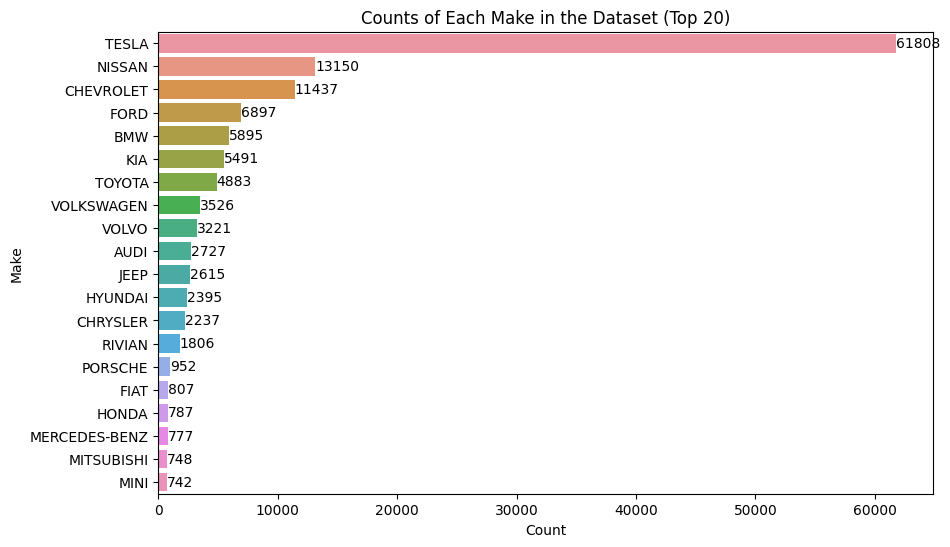

In [23]:
#Counts of Each Make in the Dataset
makeCounts = ds.groupBy('Make').count().orderBy('count', ascending=False)

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.barplot(data=makeCounts.limit(20).toPandas(), x='count', y='Make')
plt.xlabel('Count')
plt.ylabel('Make')
plt.title('Counts of Each Make in the Dataset (Top 20)')

# Add count labels to the bars
for i, count in enumerate(makeCounts.limit(20).select('count').toPandas()['count']):
    ax.text(count + 1, i, str(count), va='center')

plt.show()

`In the above graph we are just listing the top 20 because, these models hold the majority and the others were a very little portion`

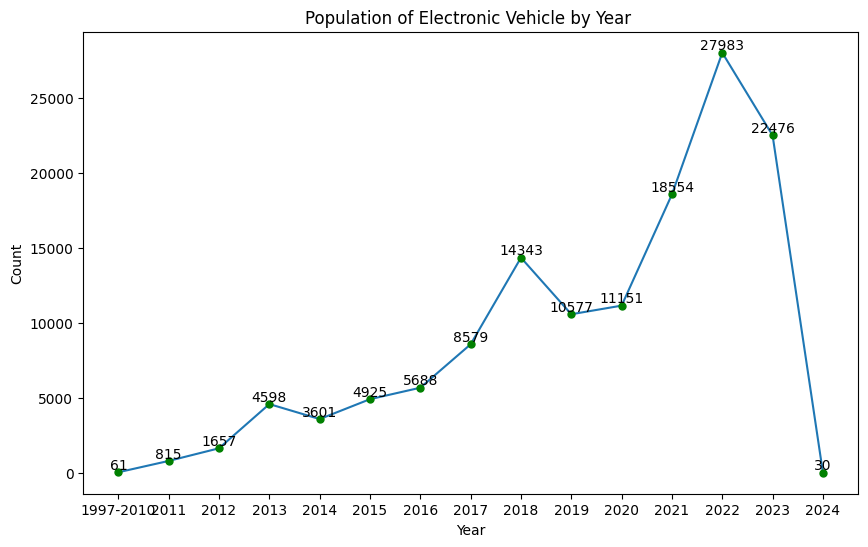

In [24]:
# Group the DataFrame by 'Model Year' and calculate the count
yearCountsC2 = ds.groupBy('Model Year').count().orderBy('Model Year')

# Create a new column 'Year Group' to group 'Model Year' values
yearCountsC2 = yearCountsC2.withColumn('Year Group',
                                     when((yearCountsC2['Model Year'] >= 1997) & (yearCountsC2['Model Year'] <= 2010),
                                          '1997-2010').otherwise(yearCountsC2['Model Year']))

# Group the DataFrame by 'Year Group' and sum the counts
groupedCountsC2 = yearCountsC2.groupBy('Year Group').sum('count').orderBy('Year Group')

# Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the line graph
sns.lineplot(data=groupedCountsC2.toPandas(), x='Year Group', y='sum(count)')

# Add colored dots and labels for each year
for index, row in groupedCountsC2.toPandas().iterrows():
    plt.plot(row['Year Group'], row['sum(count)'], 'o', markersize=5, color='green')  
    # Add colored dot for each year
    plt.text(row['Year Group'], row['sum(count)'], row['sum(count)'], ha='center', va='bottom')  
    # Add label for each year

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Population of Electronic Vehicle by Year')

plt.show()

`Here we have grouped the 1997 - 2010 as a single column for beter visualization and also we assume the 2024 is a projected population or it have a delivery date by 2024. But when we go to the Registration dataset we can interpret better. Also we can notice that there is a constant growth happening in the EV population over the years. The 2023 is less because it is having just partial data` 

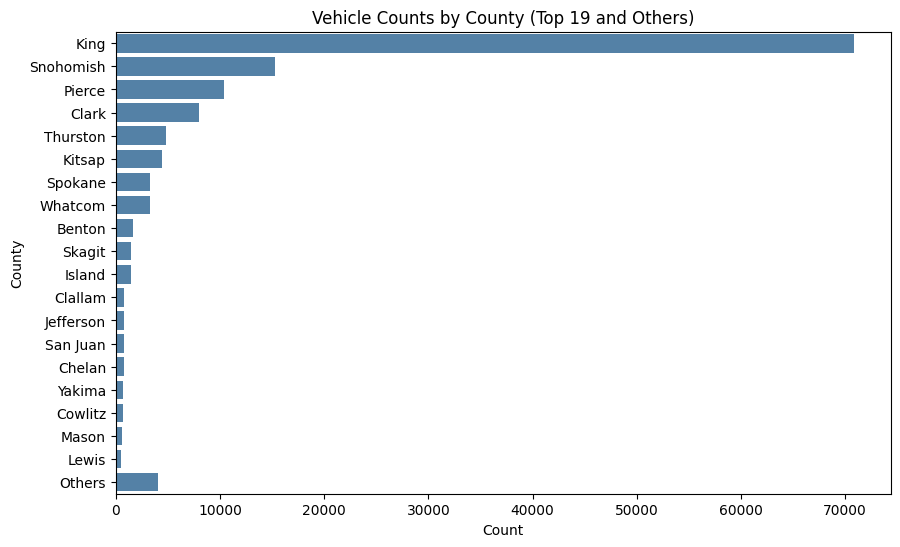

In [25]:
# Grouping the DataFrame by 'County' and calculate the count
countyCountsC3 = ds.groupBy('County').count().orderBy(col('count').desc())

# Now the top 19 counties as a separate variable
top19Counties = countyCountsC3.limit(19)

# count for remaining counties
otherCountC3 = countyCountsC3.agg({'count': 'sum'}).collect()[0][0] - top19Counties.agg({'count': 'sum'}).collect()[0][0]

# Create a new DataFrame for the top 19 counties and "Others"
countyCountsFiltered = top19Counties.union(spark.createDataFrame([("Others", otherCountC3)], ["County", "count"]))

# Create a bar graph using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the bar graph
sns.barplot(data=countyCountsFiltered.toPandas(), x='count', y='County', color='steelblue')

plt.xlabel('Count')
plt.ylabel('County')
plt.title('Vehicle Counts by County (Top 19 and Others)')

plt.show()

`in All the charts we are limiting the count for effective visualizations and here in this graph we are listing the top 19 and grouping the rest of county as others . The King coutry tops the list with an ~70K in total`

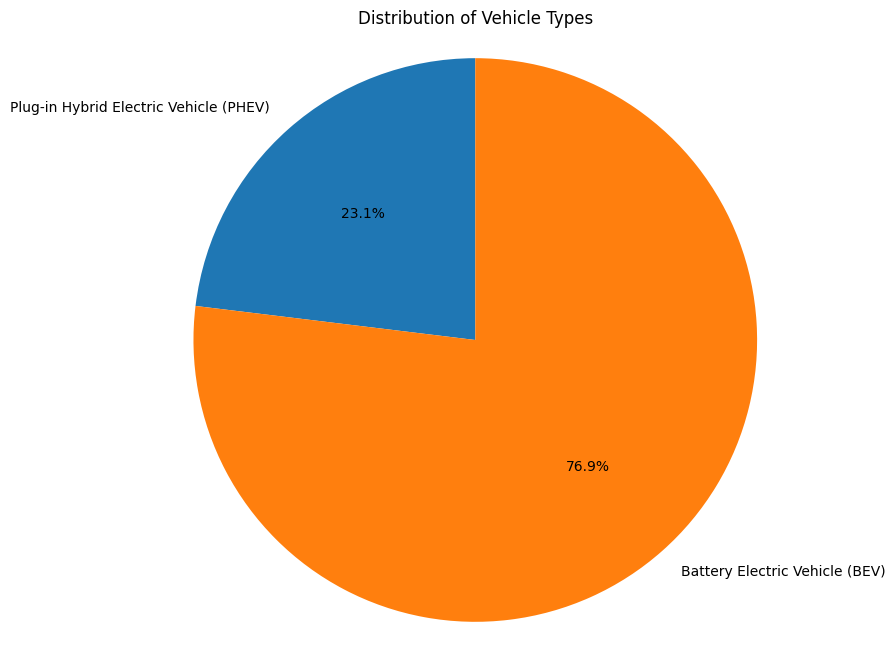

In [26]:
# Group the DataFrame by 'Electric Vehicle Type' and calculate the count
vehicleTypeCountsC4 = ds.groupBy('Electric Vehicle Type').count()

# Convert the DataFrame to a Pandas DataFrame
vehicleTypeCountsPandasC4 = vehicleTypeCountsC4.toPandas()

# Plot the pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(vehicleTypeCountsPandasC4['count'], labels=vehicleTypeCountsPandasC4['Electric Vehicle Type'], autopct='%1.1f%%', startangle=90)

plt.axis('equal')  # Ensure the pie is drawn as a circle
plt.title('Distribution of Vehicle Types')

plt.show()

`Here battery Electric Vehicle is holding 76% of the Market Share `

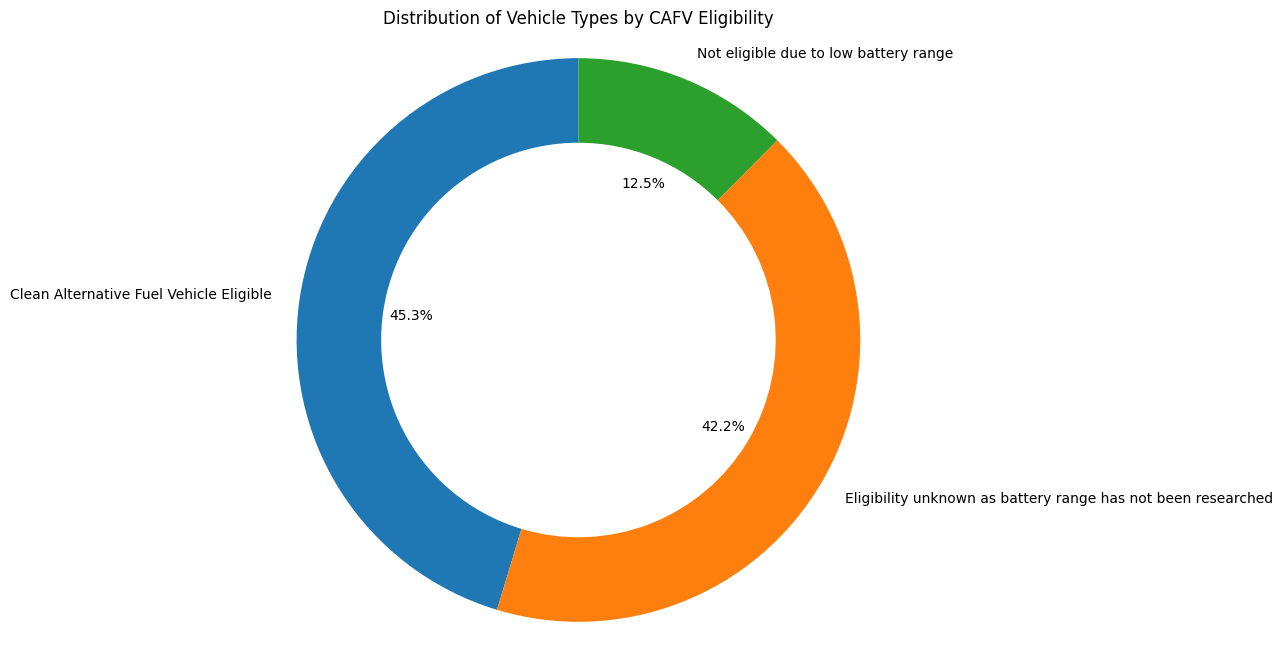

In [27]:
# Group the DataFrame by 'Electric Vehicle Type' and 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' and calculate the count
vehicle_type_cafv_counts = ds.groupBy('Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility').count()

# Convert the DataFrame to a Pandas DataFrame
vehicle_type_cafv_counts_pandas = vehicle_type_cafv_counts.toPandas()

# Pivot the DataFrame to create columns for each CAFV eligibility
pivoted_counts = vehicle_type_cafv_counts_pandas.pivot(index='Electric Vehicle Type', columns='Clean Alternative Fuel Vehicle (CAFV) Eligibility', values='count')

# Plot the donut chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(pivoted_counts.sum(), labels=pivoted_counts.columns, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

plt.axis('equal')  # Ensure the pie is drawn as a circle
plt.title('Distribution of Vehicle Types by CAFV Eligibility')

plt.show()

In [28]:
# Lets see how many models each brand have 
ds.groupBy('Make', 'Model').count().groupBy('Make').count().orderBy('count', ascending=False).show(truncate=False)

+-------------+-----+
|Make         |count|
+-------------+-----+
|AUDI         |11   |
|BMW          |11   |
|MERCEDES-BENZ|9    |
|HYUNDAI      |8    |
|FORD         |8    |
|VOLVO        |8    |
|KIA          |7    |
|TOYOTA       |6    |
|CHEVROLET    |5    |
|TESLA        |5    |
|PORSCHE      |4    |
|SMART        |3    |
|CADILLAC     |3    |
|GENESIS      |3    |
|RIVIAN       |3    |
|SUBARU       |2    |
|NISSAN       |2    |
|BENTLEY      |2    |
|MINI         |2    |
|LEXUS        |2    |
+-------------+-----+
only showing top 20 rows



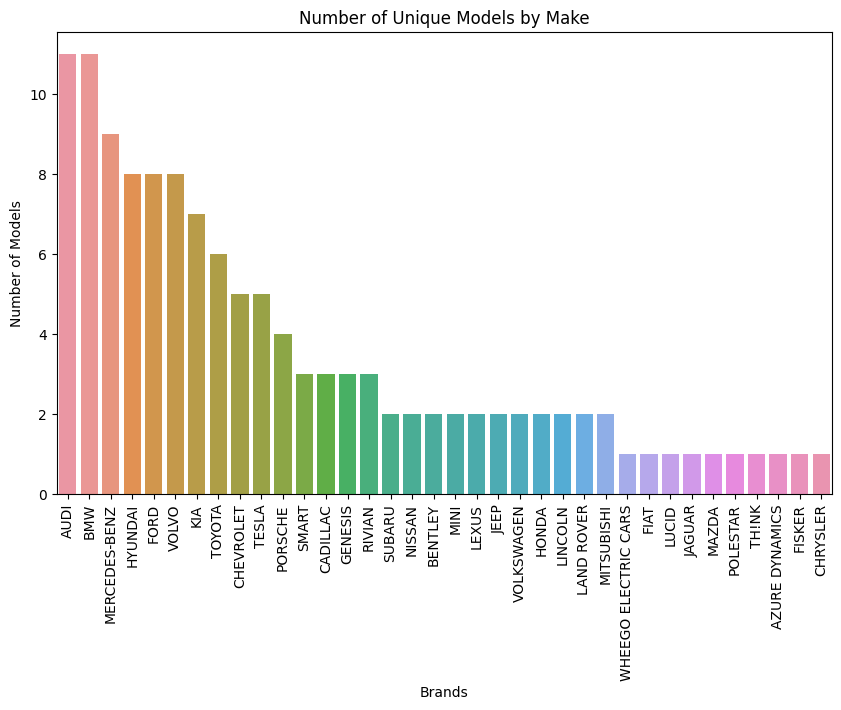

In [48]:
# Group the DataFrame by 'Make', 'Model', and count the occurrences
makeModelCounts = ds.groupBy('Make', 'Model').count()

# Group the DataFrame by 'Make' and count the number of unique models for each make
makeCounts = makeModelCounts.groupBy('Make').count().orderBy('count', ascending=False)

# Convert the DataFrame to Pandas for plotting
makeCountsPandas = makeCounts.toPandas()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.barplot(data=makeCountsPandas, x='Make', y='count')
plt.xlabel('Brands')
plt.ylabel('Number of Models')
plt.title('Number of Unique Models by Make')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [41]:
# Checking & Comparing the Electric Range between the models
# Filter out the unwanted value from 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' column
filteredDSForAnalysis = ds.filter(col('Electric Range') != 0)

# Calculate the statistics for Electric Range by Make
electricRangeStats = filteredDSForAnalysis.groupBy('Make').agg(
    min('Electric Range').alias('Minimum Range'),
    max('Electric Range').alias('Maximum Range'),
    format_number(mean('Electric Range'), 2).alias('Mean Range'),
    median('Electric Range').alias('Median Range'),
    approx_count_distinct('Electric Range').alias('Mode Range')
)

# Calculate the count of each make in the whole dataset
makeCounts = filteredDSForAnalysis.groupBy('Make').count()

# Join electricRangeStats with makeCounts
electricRangeStats = electricRangeStats.join(makeCounts, 'Make')

# Sort the DataFrame by the count in descending order
sortedMakeRangeStats = electricRangeStats.orderBy(desc('count'))

# Display the sorted DataFrame
sortedMakeRangeStats.show()

+-------------+-------------+-------------+----------+------------+----------+-----+
|         Make|Minimum Range|Maximum Range|Mean Range|Median Range|Mode Range|count|
+-------------+-------------+-------------+----------+------------+----------+-----+
|        TESLA|          200|          337|    240.49|       220.0|        18|25876|
|       NISSAN|           73|          215|    103.35|        84.0|         8|11053|
|    CHEVROLET|           35|          259|    127.62|        53.0|         7| 8697|
|          BMW|           13|          153|     47.38|        30.0|        17| 5002|
|       TOYOTA|            6|          103|     27.06|        25.0|         6| 4827|
|         FORD|           19|          100|     24.99|        19.0|        10| 3927|
|          KIA|           26|          239|     97.14|        34.0|         9| 3219|
|         JEEP|           21|           25|     22.25|        21.0|         3| 2615|
|     CHRYSLER|           32|           33|     32.29|        32.

##### `Now this table gives us a meaningful insights because we have filtered the CAFV column which has unknown columns battery range because of no research done`

In [50]:
# Checking Column
# ds.filter((ds['Electric Range'] > 0) & (ds['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)')).show(truncate=False)
# ds.filter((ds['Electric Range'] > 0) & (ds['Electric Vehicle Type']=='Battery Electric Vehicle (BEV)')).select('Clean Alternative Fuel Vehicle (CAFV) Eligibility').distinct().show(truncate=False)
# ds.filter((ds['Electric Range'] > 0)).select('Electric Vehicle Type').distinct().show(truncate=False)
# ds.filter((ds['Electric Range'] == 0) & (ds['Make']=='TESLA')).select('Electric Vehicle Type').distinct().show()
# testing.select('Electric Vehicle Type').distinct().show()
# ds.filter(ds['Electric Range'] == 0).select('Model').distinct().show()
ds.filter((ds['Electric Range'] != 0)).count()

78055

##### <u>`Analysing the Data Set 2 - EV Registration` </u>

In [32]:
dsReg.show()

+-----------------------------------+----------+--------------+----------+---------+-------+-------------------+--------------+----------------+--------------------+-------------------+----------+---------------+---------+--------------------+--------------------+----------------+------+------------+------------------+-----------+----------------------------------+--------------------------------------------------------------+---------------------------------------------+----------------------------------------+-----------------------------------------------+---------------------------------------+---------------------------------------+------------------------------------------+-------------------------+---------------------------------------+---------------------------------------+-----------------+--------------------+--------------------+
|Clean Alternative Fuel Vehicle Type|VIN (1-10)|DOL Vehicle ID|Model Year|     Make|  Model|Vehicle Primary Use|Electric Range|Odometer Reading| 

In [33]:
# Types of Uses 
dsReg.select('Transaction Type').distinct().show(truncate=False)

+--------------------------------+
|Transaction Type                |
+--------------------------------+
|Original Registration           |
|Original Title                  |
|Registration Renewal            |
|Registration at time of Transfer|
|Transfer Title                  |
+--------------------------------+



In [34]:
ds.count()

135038

In [35]:
dsReg.count()

740274

In [36]:
# Here we need only the Original Registration for this analysis so lets create a new dataset based on that

dsRegOrginal = dsReg.filter(dsReg['Transaction Type'] == 'Original Registration')
dsRegOrginal.count()

164177

In [37]:
# Finding the Null Values 
# Counting null values in each column
null_counts = dsRegOrginal.select([sum(col(c).isNull().cast("int")).alias(c) for c in dsRegOrginal.columns])

# Converting the result to a dictionary for better display
null_counts_dict = null_counts.first().asDict()

print("The count of the null values in the each columns are as follows:")
for column, count in null_counts_dict.items():
    print(f" '{column}': {count}")

The count of the null values in the each columns are as follows:
 'Clean Alternative Fuel Vehicle Type': 0
 'VIN (1-10)': 0
 'DOL Vehicle ID': 0
 'Model Year': 0
 'Make': 0
 'Model': 248
 'Vehicle Primary Use': 0
 'Electric Range': 1
 'Odometer Reading': 0
 'Odometer Code': 0
 'New or Used Vehicle': 0
 'Sale Price': 0
 'Sale Date': 142096
 'Base MSRP': 1
 'Transaction Type': 0
 'DOL Transaction Date': 0
 'Transaction Year': 0
 'County': 11
 'City': 21
 'State of Residence': 0
 'Postal Code': 13
 '2015 HB 2778 Exemption Eligibility': 0
 '2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility': 0
 'Meets 2019 HB 2042 Electric Range Requirement': 0
 'Meets 2019 HB 2042 Sale Date Requirement': 0
 'Meets 2019 HB 2042 Sale Price/Value Requirement': 0
 '2019 HB 2042: Battery Range Requirement': 0
 '2019 HB 2042: Purchase Date Requirement': 0
 '2019 HB 2042: Sale Price/Value Requirement': 0
 'Electric Vehicle Fee Paid': 0
 'Transportation Electrification Fee Paid': 24564
 'Hybrid Vehic

In [86]:
dsRegOrginal = dsRegOrginal.fillna(0, subset=['Postal Code', '2020 Census Tract'])
dsRegOrginal = dsRegOrginal.fillna('No Data', subset=['County', 'City', 'Postal Code', 'Electric Utility'])

In [88]:
# Replacing the Data with Mean 
# Calculating the mean value of 'Electric Range' column
electricRangeMeanDs2 = dsRegOrginal.select(mean(col('Electric Range'))).first()[0]

# Calculating the mean value of 'Base MSRP' column
baseMsrpMeanDs2 = dsRegOrginal.select(mean(col('Base MSRP'))).first()[0]

dsRegOrginal = dsRegOrginal.fillna(electricRangeMeanDs2, subset=['Electric Range'])
dsRegOrginal = dsRegOrginal.fillna(baseMsrpMeanDs2, subset=['Base MSRP'])

In [98]:
dsRegOrginal = dsRegOrginal.fillna('Volvo - No Model', subset=['Model'])

In [99]:
# Finding the Null Values
# Counting null values in each column
null_counts = dsRegOrginal.select([sum(col(c).isNull().cast("int")).alias(c) for c in dsRegOrginal.columns])

# Converting the result to a dictionary for better display
null_counts_dict = null_counts.first().asDict()

print("The count of the null values in each column greater than 0 are as follows:")
for column, count in null_counts_dict.items():
    if count > 0:
        print(f" '{column}': {count}")


The count of the null values in each column greater than 0 are as follows:
 'Sale Date': 142096
 'Transportation Electrification Fee Paid': 24564
 'Hybrid Vehicle Electrification Fee Paid': 24564
 'Legislative District': 637


In [97]:
dsRegOrginal.filter(dsRegOrginal['Model'].isNull()).show()
# dsRegOrginal.filter((dsRegOrginal['Make'] == 'VOLVO') & dsRegOrginal['Model'].isNull()).count()


+-----------------------------------+----------+--------------+----------+-----+-----+-------------------+--------------+----------------+--------------------+-------------------+----------+---------+---------+--------------------+--------------------+----------------+---------+-----------+------------------+-----------+----------------------------------+--------------------------------------------------------------+---------------------------------------------+----------------------------------------+-----------------------------------------------+---------------------------------------+---------------------------------------+------------------------------------------+-------------------------+---------------------------------------+---------------------------------------+-----------------+--------------------+--------------------+
|Clean Alternative Fuel Vehicle Type|VIN (1-10)|DOL Vehicle ID|Model Year| Make|Model|Vehicle Primary Use|Electric Range|Odometer Reading|       Odometer C

In [38]:
# Unique Years and Its Count 
dsRegOrginal.groupBy('Model Year').count().orderBy(col('Model Year')).show(23)

+----------+-----+
|Model Year|count|
+----------+-----+
|      1993|    1|
|      1994|    1|
|      1997|    1|
|      1998|    2|
|      1999|    4|
|      2000|   10|
|      2001|    3|
|      2002|    3|
|      2003|    1|
|      2008|   17|
|      2010|   52|
|      2011| 1504|
|      2012| 3157|
|      2013| 8316|
|      2014| 6033|
|      2015| 7951|
|      2016| 8733|
|      2017|11925|
|      2018|17732|
|      2019|12867|
|      2020|13107|
|      2021|20780|
|      2022|29512|
+----------+-----+
only showing top 23 rows



In [39]:
# County and Its Count 
dsRegOrginal.groupBy('County').count().orderBy(col('count').desc()).show()

+---------+-----+
|   County|count|
+---------+-----+
|     King|90609|
|Snohomish|17863|
|   Pierce|12211|
|    Clark|10207|
| Thurston| 5313|
|   Kitsap| 5233|
|  Spokane| 3780|
|  Whatcom| 3427|
|   Benton| 1880|
|   Island| 1572|
|   Skagit| 1508|
|  Clallam|  885|
|  Cowlitz|  863|
|Jefferson|  807|
|   Yakima|  770|
|   Chelan|  767|
| San Juan|  729|
|    Mason|  635|
|    Lewis|  546|
| Franklin|  497|
+---------+-----+
only showing top 20 rows



In [66]:
# Finding the Primary use of the 
primaryUse = dsRegOrginal.groupBy('Vehicle Primary Use').count().orderBy(col('count').desc())


In [67]:
primaryUse.show()

+--------------------+------+
| Vehicle Primary Use| count|
+--------------------+------+
|           Passenger|160065|
|Exempt (State/Cou...|  1718|
|               Truck|  1595|
|          Commercial|   750|
|Medium-Speed Elec...|    22|
|            For Hire|    15|
|Neighborhood Elec...|     7|
|                 Cab|     2|
|         Farm Exempt|     1|
|            Farm Use|     1|
|Medium-Speed Elec...|     1|
+--------------------+------+



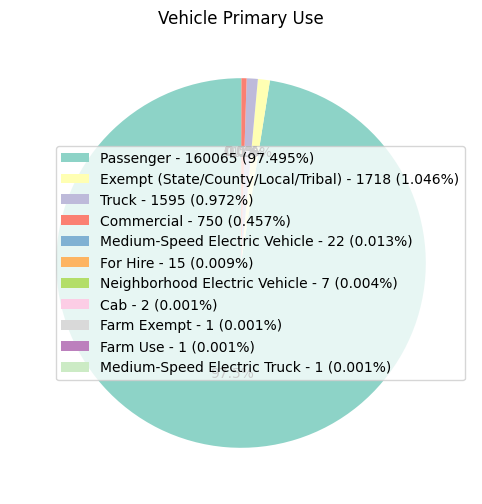

In [80]:
# Convert the grouped data to a Pandas DataFrame
primaryUseCountsC8 = dsRegOrginal.groupBy('Vehicle Primary Use').count().orderBy(col('count').desc()).toPandas()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the pie chart using Pandas
plt.pie(primaryUseCountsC8['count'], labels=None, autopct='%1.1f%%', startangle=90)

# Add a legend to the pie chart with hyphen and percentage
legend_labels = [f'{label} - {count} ({percentage:.3f}%)' for label, count, percentage in zip(primary_use_counts['Vehicle Primary Use'], primary_use_counts['count'], primary_use_counts['count'] / primary_use_counts['count'].sum() * 100)]
plt.legend(legend_labels, loc='best')

# Add a title to the pie chart
plt.title('Vehicle Primary Use')

# Display the pie chart
plt.show()

##### <u>`Analysing the Data Set 3 - Washington Weather` </u>

In [119]:
dsWeather.filter(dsWeather['Date'] >= 1990).show(40)

+----+-----+-------+
|Date|Value|Anomaly|
+----+-----+-------+
|1990| 47.3|    1.2|
|1991| 47.1|    1.0|
|1992| 48.6|    2.5|
|1993| 45.6|   -0.5|
|1994| 47.9|    1.8|
|1995| 47.5|    1.4|
|1996| 45.6|   -0.5|
|1997| 47.1|    1.0|
|1998| 48.6|    2.5|
|1999| 46.9|    0.8|
|2000| 46.2|    0.1|
|2001| 46.9|    0.8|
|2002| 46.9|    0.8|
|2003| 48.2|    2.1|
|2004| 48.4|    2.3|
|2005| 47.3|    1.2|
|2006| 47.5|    1.4|
|2007| 46.8|    0.7|
|2008| 45.8|   -0.3|
|2009| 46.4|    0.3|
|2010| 47.1|    1.0|
|2011| 45.5|   -0.6|
|2012| 47.1|    1.0|
|2013| 47.2|    1.1|
|2014| 48.4|    2.3|
|2015| 50.0|    3.9|
|2016| 48.6|    2.5|
|2017| 46.8|    0.7|
|2018| 48.1|    2.0|
|2019| 46.5|    0.4|
|2020| 48.1|    2.0|
|2021| 48.3|    2.2|
|2022| 47.1|    1.0|
+----+-----+-------+



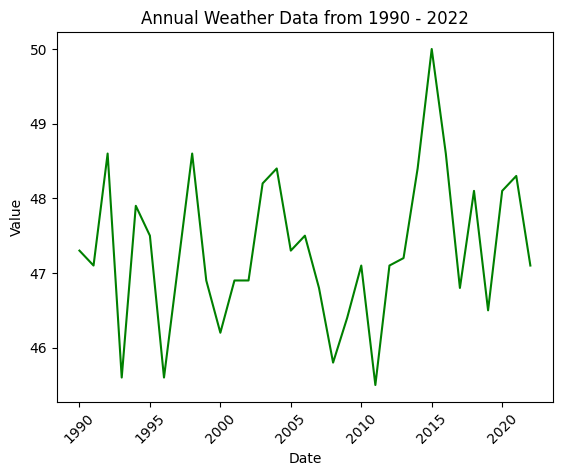

In [121]:
filteredWeatherData = dsWeather.filter(dsWeather['Date'] >= 1990)

# Extract the 'Date' and 'Value' columns from the dataset
dates = filteredWeatherData.select('Date').rdd.flatMap(lambda x: x).collect()
values = filteredWeatherData.select('Value').rdd.flatMap(lambda x: x).collect()

# Create the line plot with a different line color (e.g., red)
plt.plot(dates, values, color='green')

# Set the plot title and axis labels
plt.title('Annual Weather Data from 1990 - 2022')
plt.xlabel('Date')
plt.ylabel('Value')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the line graph
plt.show()

##### <u>`Analysing the Data Set 4 - Washington Household Income` </u>

In [188]:
dsIncome.show(40)
filteredIncomeData = dsIncome.filter(dsIncome['YEAR']>=1990)

+----+----------+----+
|YEAR|WASHINGTON|  US|
+----+----------+----+
|1929|       740| 700|
|1930|       657| 621|
|1931|       534| 529|
|1932|       402| 403|
|1933|       376| 376|
|1934|       442| 428|
|1935|       491| 478|
|1936|       570| 540|
|1937|       601| 579|
|1938|       583| 532|
|1939|       618| 562|
|1940|       667| 601|
|1941|       885| 734|
|1942|      1233| 940|
|1943|      1507|1142|
|1944|      1557|1226|
|1945|      1452|1256|
|1946|      1432|1291|
|1947|      1531|1349|
|1948|      1678|1456|
|1949|      1656|1415|
|1950|      1797|1541|
|1951|      1955|1713|
|1952|      2063|1800|
|1953|      2168|1875|
|1954|      2183|1861|
|1955|      2222|1961|
|1956|      2277|2068|
|1957|      2371|2149|
|1958|      2376|2176|
|1959|      2480|2274|
|1960|      2539|2335|
|1961|      2640|2398|
|1962|      2788|2513|
|1963|      2841|2603|
|1964|      2968|2752|
|1965|      3190|2936|
|1966|      3498|3155|
|1967|      3689|3350|
|1968|      3986|3641|
+----+-----

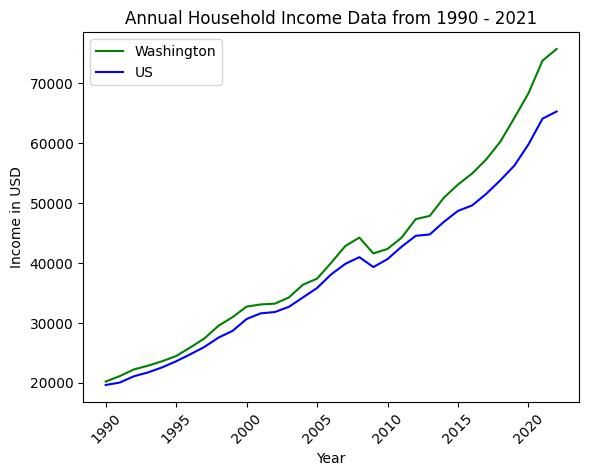

In [192]:
# Extract the 'Year' and 'Income' columns from the dataset
year = filteredIncomeData.select('YEAR').rdd.flatMap(lambda x: x).collect()
income = filteredIncomeData.select('WASHINGTON').rdd.flatMap(lambda x: x).collect()

# Extract the 'Year' and 'US' columns from the dataset
us_income = filteredIncomeData.select('YEAR', 'US').toPandas()

# Create the line plot for Washington income
plt.plot(year, income, color='green', label='Washington')

# Create the line plot for US income
plt.plot(us_income['YEAR'], us_income['US'], color='blue', label='US')

# Set the plot title and axis labels
plt.title('Annual Household Income Data from 1990 - 2021')
plt.xlabel('Year')
plt.ylabel('Income in USD')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to the plot
plt.legend()

# Display the line graph
plt.show()

####  `Feature Engineering & Modeling` <br>


##### <u>`Electric Vehicle Adoption Forecasting Model` </u>

In [129]:
# Independent and Dependent Variables 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# The EV Registration data provides us more information than Population dataset so we are proceeding with that dataset

In [132]:
dsRegOrginal.show()

+-----------------------------------+----------+--------------+----------+----------+--------+-------------------+--------------+----------------+--------------------+-------------------+----------+----------------+---------+--------------------+--------------------+----------------+------+-----------------+------------------+-----------+----------------------------------+--------------------------------------------------------------+---------------------------------------------+----------------------------------------+-----------------------------------------------+---------------------------------------+---------------------------------------+------------------------------------------+-------------------------+---------------------------------------+---------------------------------------+-----------------+--------------------+--------------------+
|Clean Alternative Fuel Vehicle Type|VIN (1-10)|DOL Vehicle ID|Model Year|      Make|   Model|Vehicle Primary Use|Electric Range|Odometer

In [138]:
dsRegWA = dsRegOrginal.filter(dsRegOrginal['State of Residence']=='WA')
dsRegWA.show()

+-----------------------------------+----------+--------------+----------+----------+--------+-------------------+--------------+----------------+--------------------+-------------------+----------+----------------+---------+--------------------+--------------------+----------------+------+-----------------+------------------+-----------+----------------------------------+--------------------------------------------------------------+---------------------------------------------+----------------------------------------+-----------------------------------------------+---------------------------------------+---------------------------------------+------------------------------------------+-------------------------+---------------------------------------+---------------------------------------+-----------------+--------------------+--------------------+
|Clean Alternative Fuel Vehicle Type|VIN (1-10)|DOL Vehicle ID|Model Year|      Make|   Model|Vehicle Primary Use|Electric Range|Odometer

In [149]:
dsRegOrginal.filter(dsRegOrginal['Transaction Year']=='2023').count()

21583

In [139]:
# Finding the Null Values
# Counting null values in each column
null_counts = dsRegWA.select([sum(col(c).isNull().cast("int")).alias(c) for c in dsRegWA.columns])

# Converting the result to a dictionary for better display
null_counts_dict = null_counts.first().asDict()

print("The count of the null values in each column greater than 0 are as follows:")
for column, count in null_counts_dict.items():
    if count > 0:
        print(f" '{column}': {count}")


The count of the null values in each column greater than 0 are as follows:
 'Sale Date': 141468
 'Transportation Electrification Fee Paid': 24533
 'Hybrid Vehicle Electrification Fee Paid': 24533


In [165]:
dsRegWA = dsRegWA.filter(dsRegWA['Postal Code'] != 0)


In [166]:
dfReg = dsRegWA
dfReg = dfReg.withColumn("Postal Code", col("Postal Code").cast("string"))
dfReg.printSchema()


root
 |-- Clean Alternative Fuel Vehicle Type: string (nullable = true)
 |-- VIN (1-10): string (nullable = true)
 |-- DOL Vehicle ID: integer (nullable = true)
 |-- Model Year: integer (nullable = true)
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = false)
 |-- Vehicle Primary Use: string (nullable = true)
 |-- Electric Range: integer (nullable = true)
 |-- Odometer Reading: integer (nullable = true)
 |-- Odometer Code: string (nullable = true)
 |-- New or Used Vehicle: string (nullable = true)
 |-- Sale Price: integer (nullable = true)
 |-- Sale Date: string (nullable = true)
 |-- Base MSRP: integer (nullable = true)
 |-- Transaction Type: string (nullable = true)
 |-- DOL Transaction Date: string (nullable = true)
 |-- Transaction Year: integer (nullable = true)
 |-- County: string (nullable = false)
 |-- City: string (nullable = false)
 |-- State of Residence: string (nullable = true)
 |-- Postal Code: string (nullable = true)
 |-- 2015 HB 2778 Exemption Eligibi

In [167]:
dfReg = dfReg.filter(dfReg['Transaction Year'] != 2023)
dfReg.count()


141974

In [168]:
dfReg = dfReg.toPandas()
dfReg.head()

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Vehicle Primary Use,Electric Range,Odometer Reading,Odometer Code,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract,Legislative District,Electric Utility
0,Battery Electric Vehicle (BEV),5YJ3E1EA0J,196972009,2018,TESLA,Model 3,Passenger,215,0,Odometer reading is not collected at time of r...,...,False,Meets battery range requirement,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,53033004402,43,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Plug-in Hybrid Electric Vehicle (PHEV),1G1RB6S53H,195316348,2017,CHEVROLET,Volt,Passenger,53,0,Odometer reading is not collected at time of r...,...,False,Meets battery range requirement,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,53033029309,33,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Battery Electric Vehicle (BEV),7SAXCAE51P,224190844,2023,TESLA,Model X,Passenger,0,0,Odometer reading is not collected at time of r...,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,53011041206,49,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...
3,Battery Electric Vehicle (BEV),WVWPR7AU4K,230162915,2019,VOLKSWAGEN,e-Golf,Passenger,125,0,Odometer reading is not collected at time of r...,...,False,Meets battery range requirement,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,53033002000,46,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
4,Battery Electric Vehicle (BEV),1N4AZ0CP3G,115796425,2016,NISSAN,Leaf,Passenger,84,0,Odometer reading is not collected at time of r...,...,False,Meets battery range requirement,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,53033022003,45,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [170]:
# Preparing the Year and Postal Code for One Hot Encoding

oneHotDs1 = dfReg.groupby(['Transaction Year', 'Postal Code']).count()[['Make']]
oneHotDs1.reset_index(inplace=True) 
oneHotDs1 = oneHotDs1.rename(columns={'Transaction Year': 'Year', 'Make': 'Brand'})

# Sort by year and  postal code
oneHotDs1['Postal Code'] = oneHotDs1['Postal Code'].astype(int)
oneHotDs1 = oneHotDs1.sort_values(['Year', 'Postal Code'])
oneHotDs1['Postal Code'] = oneHotDs1['Postal Code'].astype(str)
oneHotDs1

,Year,Postal Code,Brand
0,2010,98033,3
1,2010,98040,1
2,2010,98045,1
3,2010,98052,1
4,2010,98070,1
...,...,...,...
4348,2022,99357,8
4349,2022,99361,2
4350,2022,99362,79
4351,2022,99402,3


In [171]:
def oneHotEncodeColumn(colName, df):
    # Get values to encode
    col = df[colName]
    values = np.array(col)

    # Encode each value as an integer index
    encoderLabel = LabelEncoder()
    intEncoded = encoderLabel.fit_transform(values)
    labelZipCode = list(encoderLabel.classes_)

    # Binary encode using one-hot encoder
    oneHotEncoder = OneHotEncoder(sparse=False)
    intEncoded = intEncoded.reshape(len(intEncoded), 1)
    oneHotEncoded = oneHotEncoder.fit_transform(intEncoded)

    # Concatenate one-hot encoding to the given dataframe
    df = df.drop(colName, axis=1)
    df = pd.concat([df, pd.DataFrame(data=oneHotEncoded, columns=labelZipCode)], axis=1)

    return df

In [172]:
regWaLabelOneHot = oneHotEncodeColumn('Postal Code', oneHotDs1)
regWaLabelOneHot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Year,Brand,98001,98002,98003,98004,98005,98006,98007,98008,...,99352,99353,99354,99356,99357,99360,99361,99362,99402,99403
0,2010,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,2022,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4349,2022,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4350,2022,79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4351,2022,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [173]:
dsEncodeMain = ds.toPandas()
dsEncodeMain.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,53067010910
1,1N4BZ1DV4N,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,53029972000
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,53061052502
3,5YJ3E1EBXL,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,53061050403


In [179]:
# Creating a dataframe to Classify the counts based on Year
electricVehicleLabelPopulation = dsEncodeMain.groupby('Model Year').count().loc[2010:2022, ['State']]
electricVehicleLabelPopulation.reset_index(inplace=True)
electricVehicleLabelPopulation.columns = ['Model Year', 'Count']
electricVehicleLabelPopulation.head(13)

,Model Year,Count
0,2010,23
1,2011,815
2,2012,1657
3,2013,4598
4,2014,3601
5,2015,4925
6,2016,5688
7,2017,8579
8,2018,14343
9,2019,10577


In [183]:
# Converting the data to pandas dataframe
dfWeatherPd = dsWeather.toPandas()

In [185]:
# Preparing the Weather Data for One Hot Encoding
oneHotDs2 = dfWeatherPd[(dfWeatherPd['Date'] >= 2010) & (dfWeatherPd['Date'] <= 2022)].reset_index()
oneHotDs2 = oneHotDs2.merge(right=oneHotDs1, how='outer', left_on='Date', right_on='Year')[['Date', 'Value', 'Anomaly']]
oneHotDs2

,Date,Value,Anomaly
0,2010,47.1,1.0
1,2010,47.1,1.0
2,2010,47.1,1.0
3,2010,47.1,1.0
4,2010,47.1,1.0
...,...,...,...
4348,2022,47.1,1.0
4349,2022,47.1,1.0
4350,2022,47.1,1.0
4351,2022,47.1,1.0


In [193]:
dfIncomePd = dsIncome.toPandas()

In [196]:
# Preparing the Income Data for One Hot Encoding

oneHotDs3 = dfIncomePd[dfIncomePd['YEAR'] >= 2010].sort_values('YEAR', ascending=True).reset_index()
oneHotDs3 = oneHotDs3.merge(right=oneHotDs1, how='outer', left_on='YEAR', right_on='Year')[['YEAR', 'WASHINGTON', 'US']]
oneHotDs3

,YEAR,WASHINGTON,US
0,2010,42348,40649
1,2010,42348,40649
2,2010,42348,40649
3,2010,42348,40649
4,2010,42348,40649
...,...,...,...
4348,2022,75698,65280
4349,2022,75698,65280
4350,2022,75698,65280
4351,2022,75698,65280


In [197]:
# X Matrix and Y Labels

X = regWaLabelOneHot.copy()
X = X.drop('Brand', axis=1)
X['Weather'] = oneHotDs2['Value']
X['Income'] = oneHotDs3['WASHINGTON']
X

,Year,98001,98002,98003,98004,98005,98006,98007,98008,98010,...,99354,99356,99357,99360,99361,99362,99402,99403,Weather,Income
0,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.1,42348
1,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.1,42348
2,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.1,42348
3,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.1,42348
4,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.1,42348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,47.1,75698
4349,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,47.1,75698
4350,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,47.1,75698
4351,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,47.1,75698


In [198]:
y = oneHotDs1[['Year', 'Postal Code', 'Brand']]
y

,Year,Postal Code,Brand
0,2010,98033,3
1,2010,98040,1
2,2010,98045,1
3,2010,98052,1
4,2010,98070,1
...,...,...,...
4348,2022,99357,8
4349,2022,99361,2
4350,2022,99362,79
4351,2022,99402,3


##### `Linear Regression Model`

In [199]:
# Training the Model

X_train = X[(X['Year'] >= 2010) & (X['Year'] <= 2020)]
X_test = X[(X['Year'] >= 2021) & (X['Year'] <= 2022)]

y_train = y[(y['Year'] >= 2010) & (y['Year'] <= 2020)]
y_test = y[(y['Year'] >= 2021) & (y['Year'] <= 2022)]

In [201]:
# Fitting the Model 

model = LinearRegression()
model.fit(X_train, y_train['Brand'])

LinearRegression()

In [204]:
def make_prediction_input(year, zip_code, temp, income):
  col = oneHotDs1['Postal Code']
  values = np.array(col)

  # Encode each value as an integer index
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(values)
  zip_code_labels = list(label_encoder.classes_)

  zip_code_input = list(np.zeros(len(zip_code_labels)))
  zip_code_index = label_encoder.transform([str(zip_code)])[0]
  zip_code_input[zip_code_index] = 1
  
  pred_input = []
  pred_input.append(year)
  pred_input.extend(zip_code_input)
  pred_input.append(temp)
  pred_input.append(income)
  return pred_input

In [205]:
pred_input = make_prediction_input(2022, 98052, 47, 70000)
model.predict([pred_input])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([281.50164669])

In [206]:
from sklearn.metrics import mean_squared_error

In [207]:
# Encode each value as an integer index
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(np.array(oneHotDs1['Postal Code']))
zip_code_labels = list(label_encoder.classes_)

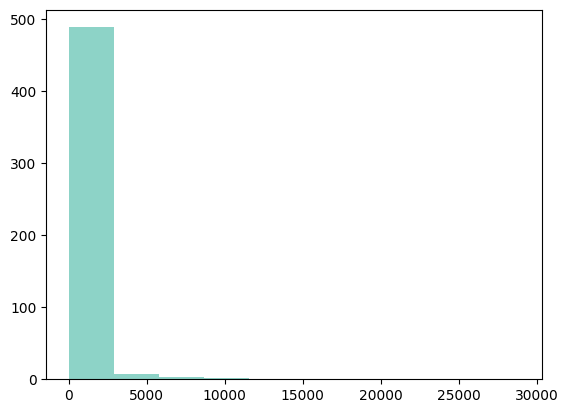

381.02785097314575

In [215]:

# Predict over data from each zip code
ev_adoption_linear_train = {}
for zip_code in zip_code_labels:
  train_vals = X_train[X_train[zip_code] == 1]
  if len(train_vals) > 0:
    ev_adoption_linear_train[zip_code] = model.predict(train_vals)

# Compute mse between predicted values and true values
mse_dict_train = {}
zip_code_train_outliers = []
for zip_code, nums in ev_adoption_linear_train.items():
  mse = mean_squared_error(nums, y_train[y_train['Postal Code'] == zip_code]['Brand'])
  mse_dict_train[zip_code] = mse

# Plot histogram of mse per zip code, and print out mean of mse over zip codes
plt.hist(mse_dict_train.values());
plt.show()

np.mean(list(mse_dict_train.values()))

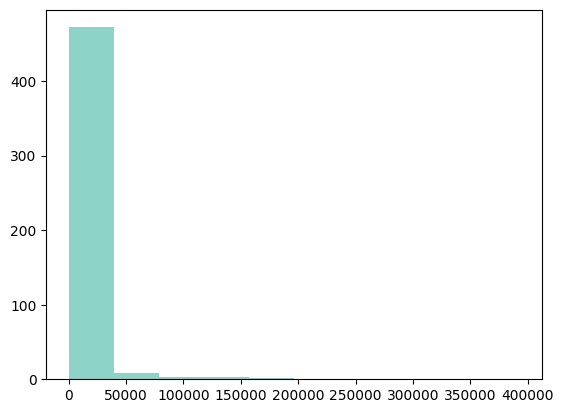

6713.727129728612

In [216]:
# Predict over data for each zip code of test segment
ev_adoption_linear_test = {}
for zip_code in zip_code_labels:
  test_vals = X_test[X_test[zip_code] == 1]
  if len(test_vals) > 0:
    ev_adoption_linear_test[zip_code] = model.predict(test_vals)

# Compute mse between predicted values and true values
mse_dict_test = {}
for zip_code, nums in ev_adoption_linear_test.items():
  mse = mean_squared_error(nums, y_test[y_test['Postal Code'] == zip_code]['Brand'])
  mse_dict_test[zip_code] = mse

# Plot histogram of mse per zip code, and print out mean of mse over zip codes
plt.hist(mse_dict_test.values());
plt.show()
np.mean(np.array(list(mse_dict_test.values())))


In [217]:
# Filter out high mse zip code, place in list
threshold = 1e10
zip_code_test_outliers = []
for key, val in list(mse_dict_test.items()):
  if val > threshold:
    zip_code_test_outliers.append(key)
    mse_dict_test.pop(key)

# Print out new mean of filtered mse
np.mean(np.array(list(mse_dict_test.values())))

6713.727129728612

In [219]:
# Remove outlier zip codes from the dataframe, then one hot encode
label_ev_reg_pruned = oneHotDs1[~oneHotDs1['Postal Code'].isin(zip_code_test_outliers)].reset_index(drop=True)
label_ev_reg_pruned_ohe = oneHotEncodeColumn('Postal Code', label_ev_reg_pruned)

# Create X matrix
X = label_ev_reg_pruned_ohe.copy()
X = X.drop('Brand', axis=1)
X['Weather'] = oneHotDs2['Value']
X['Income'] = oneHotDs3['WASHINGTON']

# Create y vector
y = label_ev_reg_pruned[['Year', 'Postal Code', 'Brand']]

# Generate train test split
X_train = X[(X['Year'] >= 2010) & (X['Year'] <= 2020)]
X_test = X[(X['Year'] >= 2021) & (X['Year'] <= 2022)]

y_train = y[(y['Year'] >= 2010) & (y['Year'] <= 2020)]
y_test = y[(y['Year'] >= 2021) & (y['Year'] <= 2022)]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [220]:
model = LinearRegression()
model.fit(X_train, y_train['Brand'])

LinearRegression()

`Auto Regressive Integrated Moving Average Model (ARIMA)`

In [222]:
from statsmodels.tsa.arima_model import ARIMA

In [223]:
oneHotDs1.sort_values('Brand', ascending=False).head(10)

,Year,Postal Code,Brand
3927,2022,98052,1067
3893,2022,98004,724
3484,2021,98052,708
3900,2022,98012,693
3915,2022,98033,680
3895,2022,98006,657
3968,2022,98148,576
2673,2019,98052,556
3938,2022,98074,543
2271,2018,98052,538


Predicted=257.067674, Expected=442.000000
Predicted=585.659559, Expected=680.000000
Test MSE: 21550.042


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


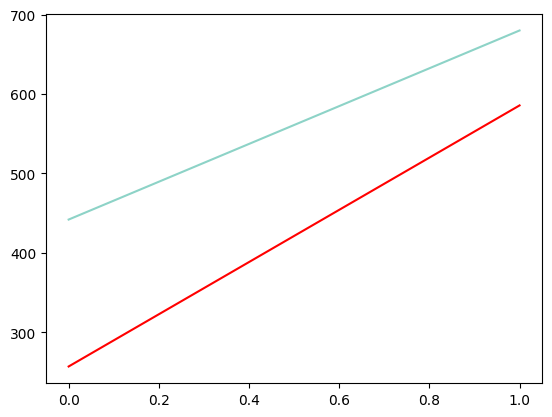

In [227]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

predictions = []
train = np.array(oneHotDs1[oneHotDs1['Postal Code'] == '98033']['Brand']).astype(float)[:8]
test = np.array(y_test[y_test['Postal Code'] == '98033']['Brand'].astype(float))
history = [x for x in train]

for t in range(len(test)):
    arima_model = ARIMA(history, order=(2, 1, 0))
    arima_model_fit = arima_model.fit()
    output = arima_model_fit.forecast()
    
    pred = output[0]
    predictions.append(pred)
    true_val = test[t]
    history.append(true_val)
    print('Predicted=%f, Expected=%f' % (pred, true_val))
 
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
washington_temp_model = LinearRegression()
washington_temp_model.fit(oneHotDs1[['Year']], oneHotDs1['Value'])
washington_temp_data = washington_temp_model.predict(np.arange(2023, 2051)[:, np.newaxis])
washington_temp_data = np.add(washington_temp_data, np.random.normal(0, oneHotDs1['Value'].std() / 2, 31))

plt.title('Washington State Average Temperature (F) Over Time')
plt.plot(np.arange(2023, 2051), washington_temp_data);

wa_future_temp_df = pd.DataFrame(data=np.transpose([np.arange(2020, 2051), washington_temp_data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


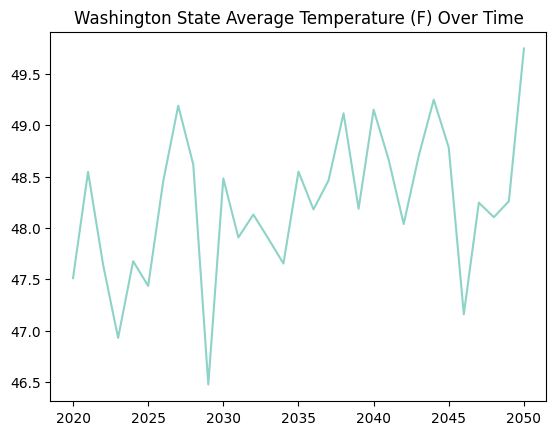

In [231]:
washington_temp_model = LinearRegression()
washington_temp_model.fit(oneHotDs2[['Date']], oneHotDs2['Value'])
washington_temp_data = washington_temp_model.predict(np.arange(2020, 2051)[:, np.newaxis])
washington_temp_data = np.add(washington_temp_data, np.random.normal(0, oneHotDs2['Value'].std() / 2, 31))

plt.title('Washington State Average Temperature (F) Over Time')
plt.show()
plt.plot(np.arange(2020, 2051), washington_temp_data);

wa_future_temp_df = pd.DataFrame(data=np.transpose([np.arange(2020, 2051), washington_temp_data]), columns=['Year', 'Temp'])

In [ ]:
washington_income_model = LinearRegression()
washington_income_model.fit(oneHotDs3[['YEAR']], oneHotDs3['WASHINGTON'])
washington_income_data = washington_income_model.predict(np.arange(2022, 2051)[:, np.newaxis])
washington_income_data = np.add(washington_income_data, np.random.normal(0, oneHotDs3['WASHINGTON'].std() / 2, 31))

plt.title('Washington State Income over Time')
plt.show()
plt.plot(np.arange(2022, 2051), washington_income_data)

wa_future_income_df = pd.DataFrame(data=np.transpose([np.arange(2022, 2051), washington_income_data]), columns=['Year', 'Income'])